In [13]:
import numpy as np
import pandas as pd
from predict import predict, plot_timeline
from data_transformation import prep, split



In [14]:
df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  

df_feat = prep(df)
train, test = split(df_feat)

y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel3.sav')

#test

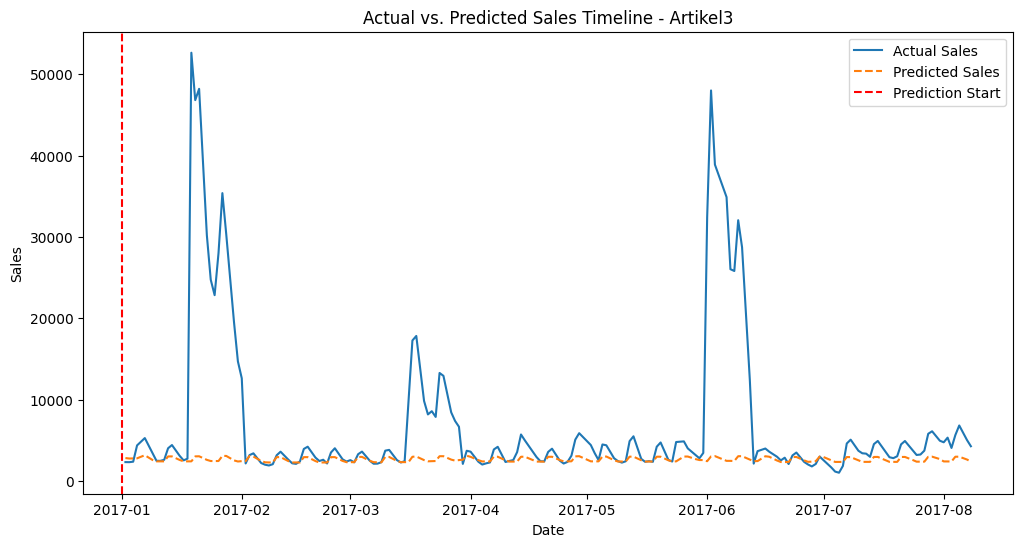

In [15]:
test['predicted'] = y_pred 
plot_timeline(test, variant = '2017')

Winsorization 95th percentile

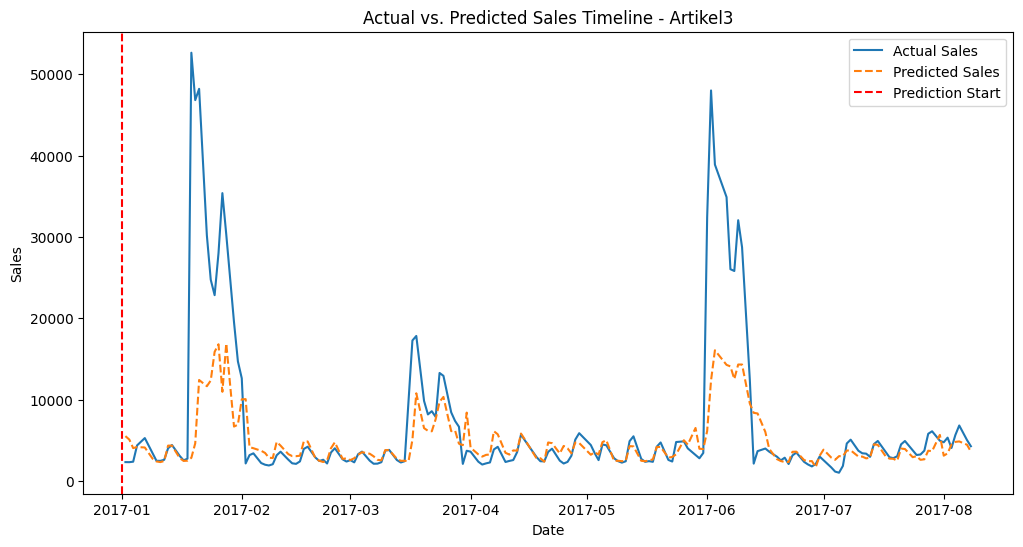

In [4]:
df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  

df_feat = prep(df)
train, test = split(df_feat)

y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel3_winsorize.sav')
test['predicted'] = y_pred 
plot_timeline(test, variant = '2017')


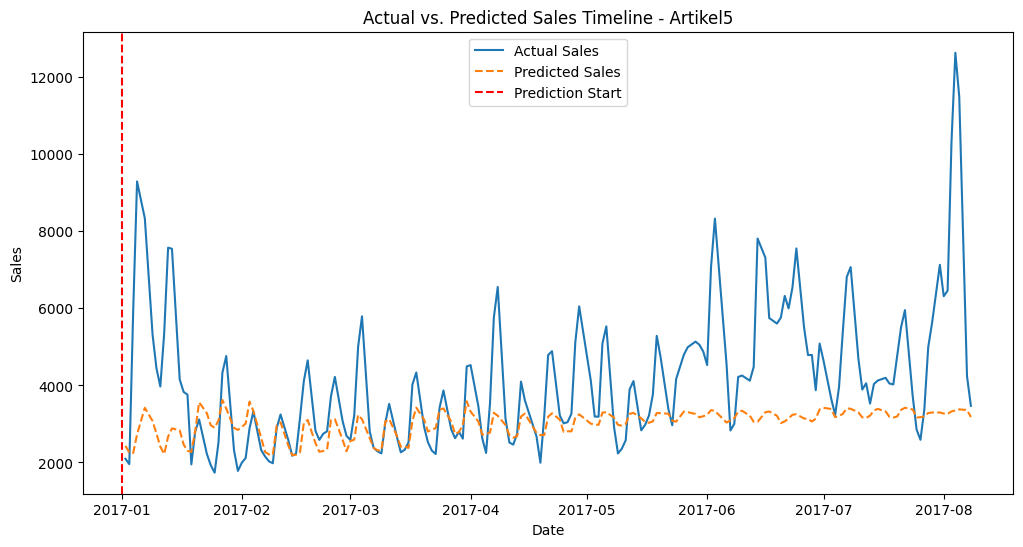

In [5]:
df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  
df_feat = prep(df)
train, test = split(df_feat)

y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel5.sav')
test['predicted'] = y_pred 
plot_timeline(test, variant = '2017', predicted_value = 'Artikel5')

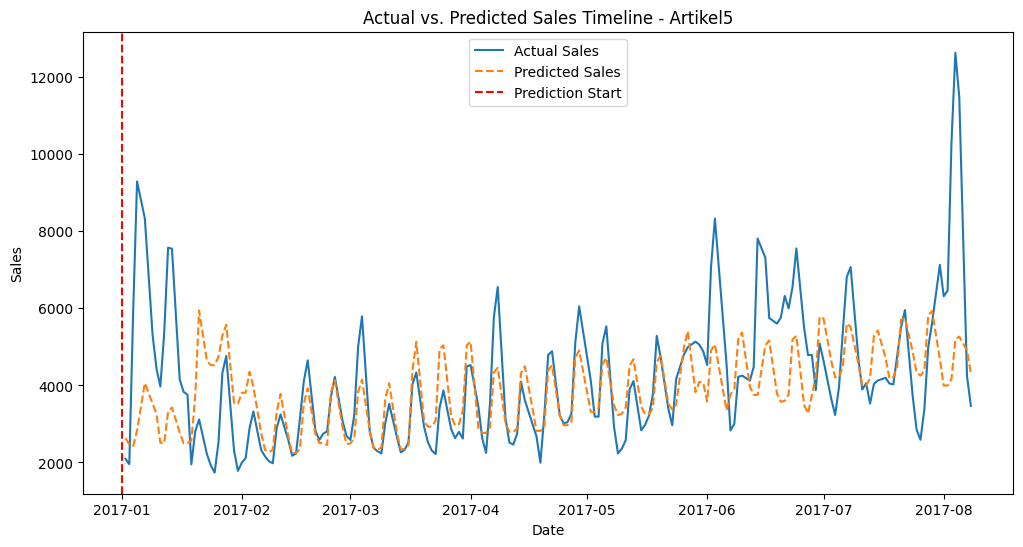

In [6]:
df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  
df_feat = prep(df)
train, test = split(df_feat)
y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel5_winsorize.sav')
test['predicted'] = y_pred 
plot_timeline(test, variant = '2017', predicted_value = 'Artikel5')

Die outlier von Artikel5 viel schwieriger zu predictn, siehe EDA.

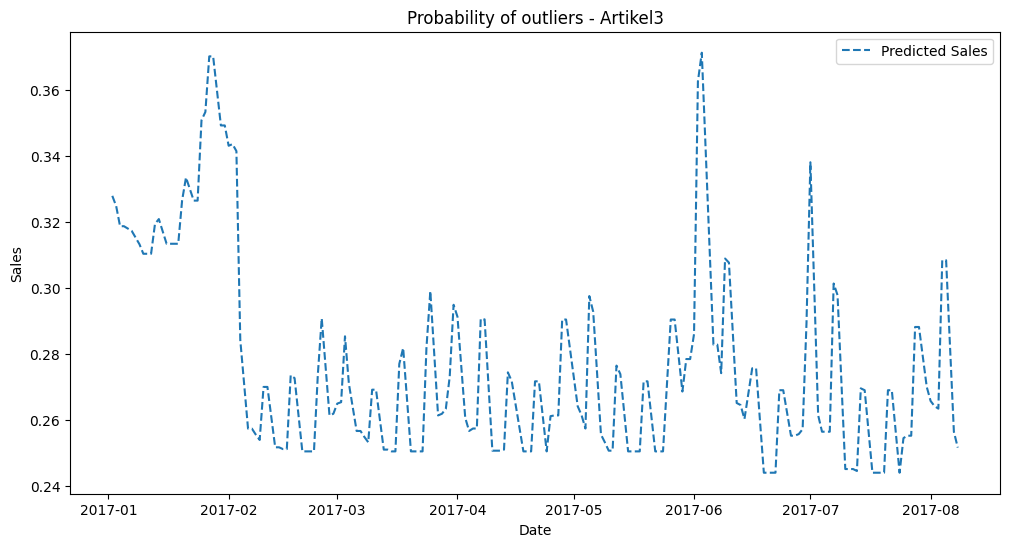

In [7]:

df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  

df_feat = prep(df)
train, test = split(df_feat)    
y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel3_winsorize.sav')
outlier = predict(test, filename = 'models/model_outlier_detector_Artikel3.sav', type = 'Outlier', outlier_predictor='Artikel3')
    
test['predicted'] = y_pred 
test['outlier'] = outlier 
    #print(test)
plot_timeline(test,  predicted_value = 'Artikel3', variant = 'outliers', outlier = True)

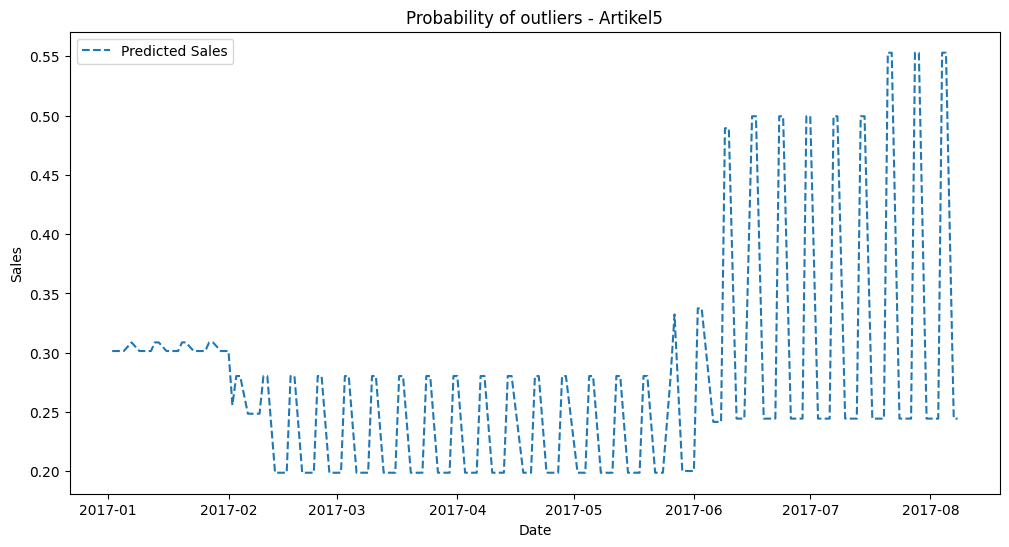

In [8]:

df = pd.read_excel('data/Zeitreihen_2Artikel.xlsx')  

df_feat = prep(df)
train, test = split(df_feat)    
y_pred = predict(test, filename = 'models/model_XGBOOST_Artikel5_winsorize.sav')
outlier = predict(test, filename = 'models/model_outlier_detector_Artikel5.sav', type = 'Outlier', outlier_predictor='Artikel5')
    
test['predicted'] = y_pred 
test['outlier'] = outlier 
    #print(test)
plot_timeline(test,  predicted_value = 'Artikel5', variant = 'outliers', outlier = True)

In [9]:
from datetime import datetime, timedelta

# create df of 2018 dates
start_date = datetime(year=2018, month=1, day=1)
end_date = datetime(year=2018, month=8, day=30)
date_range = [start_date + timedelta(days=x) for x in range(0, (end_date - start_date).days + 1)]

df_2018 = pd.DataFrame({'DATUM': date_range})
df_2018_feat = prep(df_2018)



In [10]:
y_pred = predict(df_2018_feat, filename = 'models/model_XGBOOST_Artikel3_winsorize.sav')
outlier = predict(df_2018_feat, filename = 'models/model_outlier_detector_Artikel3.sav', type = 'Outlier', outlier_predictor='Artikel3')

df_2018_feat['predicted'] = y_pred 
df_2018_feat['outlier'] = outlier 


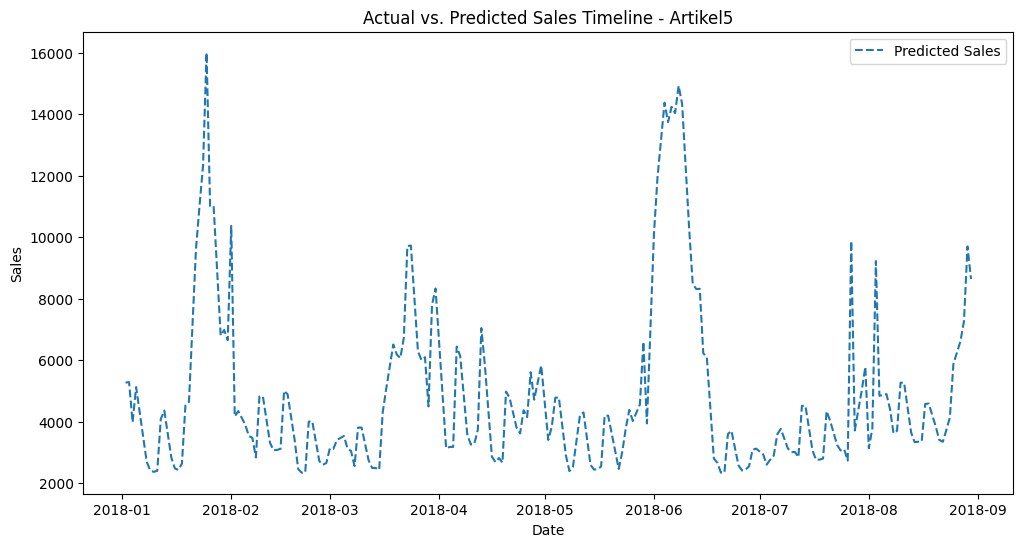

In [11]:
plot_timeline(df_2018_feat, variant = 'predicted',  predicted_value = 'Artikel5', outlier = True)

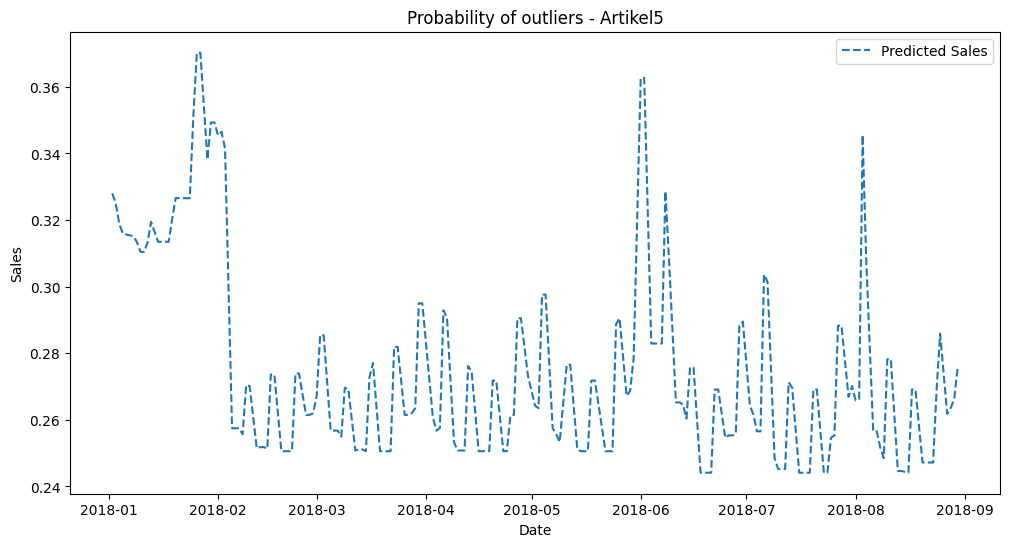

In [12]:
plot_timeline(df_2018_feat, variant = 'outliers',  predicted_value = 'Artikel5')

https://towardsdatascience.com/forecasting-with-machine-learning-models-95a6b6579090

log transform